### This notebooks shows how to apply Monte Carlo simulations to Option pricing (European Call):

**European Call Option** is a derivative contract that gives the holder the right (but not the obligation) to buy an underlying asset (e.g. stock) at a predetermined price (strike price) on the expiration date.


Premium is the price the buyer pays to acquire the option; it is paid upfront and non-refundable, regardless of whether the option is exercised or not.


**Option Pricing using Monte Carlo**: simulating potential paths of the underlying stock price using Geometric Brownian Motion (GBM), and then calculating the payoff.

**GBM** is a continuous-time stochastic process that assumes stock prices follow a log-normal distribution.

The stochastic differential equation (SDE):

$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

has a solution in terms of stock prices:

$$S_t = S_0 \exp\left( \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t \right)$$

where:
- $S_t$ = Stock price at time $t$
- $S_0$ = Initial stock price at time t = 0
- $\mu$ = Drift term (average rate of return or expected return of the stock). It is the deterministic trend in the stock's price.
- $\sigma$ = Volatility (standard deviation of returns)

- $dW_t$ = Increment of a Wiener process (Brownian motion) representing random fluctuations (with mean 0 and variance $dt$). Wiener process has independent and normally distributed increments



**GBM model can be simulated discretely** by using the following formula to update the stock price over small time steps $\Delta t $ (e.g., daily, monthly):

$$S_{t+\Delta t} = S_t \exp\left( \left( \mu - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} \, Z_t \right)$$

where:
- $S_{t+\Delta t}$ = stock price at the next time step.
- $Z_t$ =  random variable drawn from $ N(0, 1)$.


This discrete update rule generates a path of stock prices over time, which can be used to simulate future stock price trajectories:


## Part 1: Option Pricing using Monte Carlo simulation code:

In [2]:
import numpy as np

# Initialization
S0 = 100  # Initial stock price
K = 105   # Strike price
T = 1     # Time to maturity in years
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility (20%)
N = 10000  # Number of simulations
M = 1  # Number of time steps (in this case, 1 step)

# Simulate the stock price paths using GBM
np.random.seed(42)
dt = T / M  # Time step
payoffs = []

for i in range(N):
    # Generate a random sample for the Brownian motion component
    Z = np.random.normal(0, 1, M)  # Standard normal random variables

    # Simulate the stock price path (GBM model)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z.sum())  # Final stock price

    # Calculate the Payoff
    payoff = max(ST - K, 0)  # max(ST-K, 0) is the payoff of a call option
    payoffs.append(payoff)

# Discount Payoffs back to present value
option_price = np.exp(-r * T) * np.mean(payoffs)

# Output the results
print(f"Monte Carlo estimate of the European Call Option price: ${option_price:.2f}")


Monte Carlo estimate of the European Call Option price: $8.02


### Explanation of the Code:


1.**Stock Price Simulation** We used Geometric Brownian Motion to model the price evolution of the underlying asset. The formula for the stock price at time T is:

$$S_T = S_0 \cdot \exp\left( \left( r - \frac{\sigma^2}{2} \right) T + \sigma \cdot \sqrt{T} \cdot Z \right)$$

where $Z$ is a random variable drawn from a normal distribution.

2.**Payoff Calculation**: The payoff of a **European call option** at maturity is the difference between the final stock price and the strike price \(K\), but only if the stock price is greater than the strike price (i.e., `max(S_T - K, 0)`).

3.**Monte Carlo simulation**: We run **N simulations** of the stock price paths and calculate the average payoff, which is discounted to the present using the **risk-free rate \(r\)**.

4.**Discounted Present Value**: The average payoff is discounted back to today to obtain the **option price**.

## Part 2: Visualization

Plotting multiple stock price paths on the same graph to visualize possible future trajectories based on the given parameters:

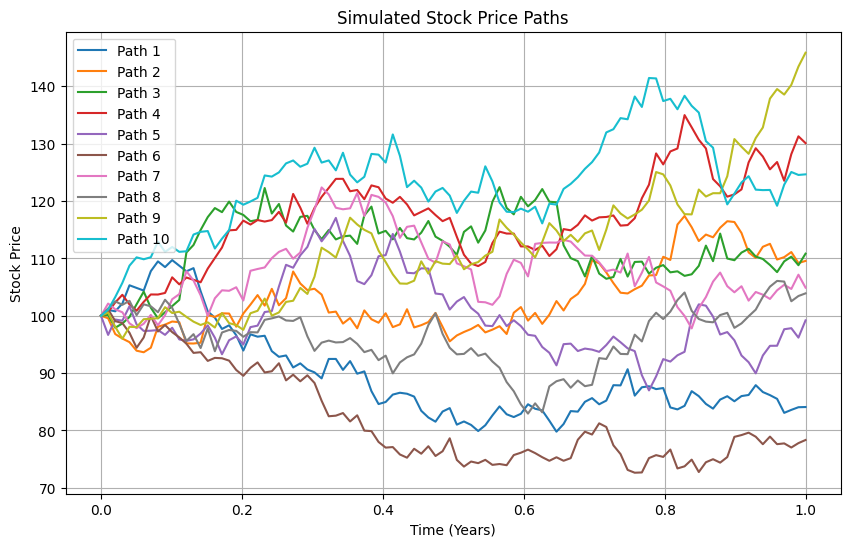

In [3]:
import matplotlib.pyplot as plt

# Set parameters
S0 = 100         # Initial stock price
mu = 0.05        # Drift (mean return)
sigma = 0.2      # Volatility (standard deviation)
T = 1            # Time horizon (in years)
dt = 0.01        # Time step (in years)
n_steps = int(T / dt)  # Number of time steps
n_paths = 10     # Number of stock price paths to simulate

# Time array
t = np.linspace(0, T, n_steps)

# Simulate multiple paths
np.random.seed(42)  # Set seed for reproducibility
paths = np.zeros((n_paths, n_steps))
paths[:, 0] = S0

for i in range(n_paths):
    for j in range(1, n_steps):
        # Simulate the next price using Geometric Brownian Motion
        dW = np.random.normal(0, np.sqrt(dt))  # Normal random step (Wiener process)
        paths[i, j] = paths[i, j-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, paths[i], label=f'Path {i+1}')

plt.title('Simulated Stock Price Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()



### Explanation:

We plot multiple stock price paths, each representing a potential future scenario based on the given parameters.

These are simulated paths of the stock price, each of which follows the dynamics described by the Geometric Brownian Motion model.

**Simulation**:
  - The loop generates `n_paths` paths. For each path, the stock price is simulated using the GBM formula.
  - `dW` represents the change in the Wiener process, which is modeled as a random draw from a normal distribution.




